In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
# from sklearn.externals import six
import six
# from id3 import Id3Estimator
from sklearn import tree

In [2]:
data = pd.read_csv("antfile17.csv")
data.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,56,2,2,51,169,1200,37,16,35,0.848864,...,0.875000,2,0.409639,0.155844,1,5,31.607143,14,2.1964,1
1,21,1,2,14,47,124,10,4,18,0.700000,...,0.857143,0,0.000000,0.325397,0,0,26.047619,10,2.6190,0
2,11,2,0,17,15,13,15,3,11,0.750000,...,1.000000,3,0.200000,0.220779,0,0,7.272727,1,0.7273,0
3,15,4,3,499,30,0,498,1,15,0.392857,...,1.000000,1,0.619048,0.322222,1,3,9.066667,2,0.6667,0
4,7,1,0,16,7,21,15,1,7,2.000000,...,0.000000,0,0.000000,1.000000,0,0,0.000000,1,1.0000,1


In [3]:
X = data.drop('bug', axis = 1)
y = data['bug']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 102)

In [5]:
scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=22,min_samples_split=7,  min_samples_leaf=5,)
clf.fit(X_trained_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=22, min_samples_leaf=5,
                       min_samples_split=7)

In [7]:
y_pred = clf.predict(X_test_scaled)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.78125
Confusion Matrix:
 [[159  20]
 [ 29  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       179
           1       0.44      0.36      0.40        45

    accuracy                           0.78       224
   macro avg       0.65      0.62      0.63       224
weighted avg       0.77      0.78      0.77       224



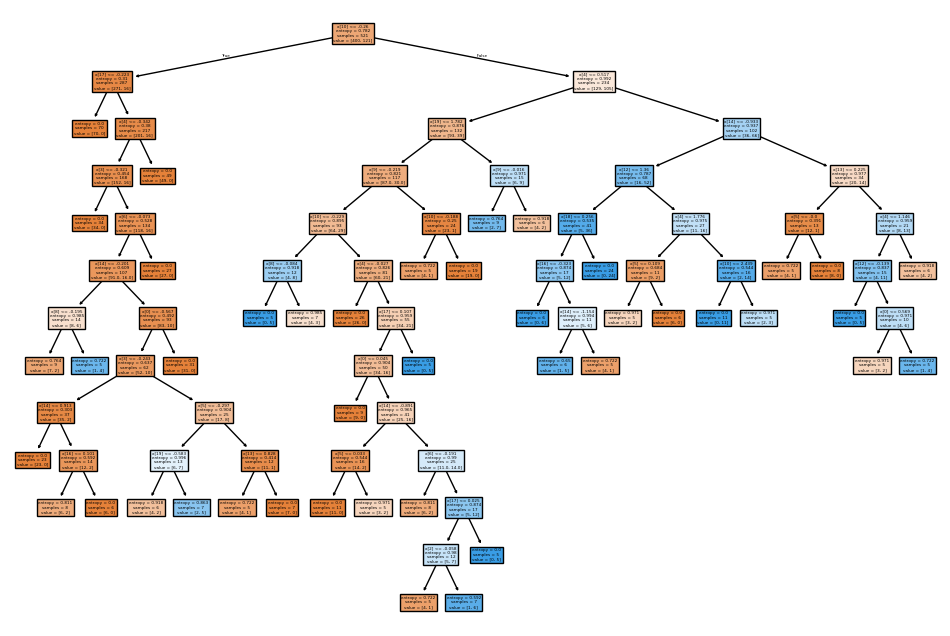

In [9]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True)
plt.show()

In [ ]:
from id3 import IdEstimator
id3_estimator = Id3Estimator()
id3_estimator.fit(X_train, y_train)